In [53]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [54]:
ls 100ns

bsub_villin_score_msmlag100ns_splittica_alleigen.sh
dtrajs_villin_lag100ns.npy
dtrajs_villin_lag100ns_2eigen.npy
scores_msmlag100ns_splittica_alleigen.npy
villin_100ns_postprocess.ipynb
villin_100ns_top_model.ipynb
villin_cktest_lag100ns_outto1350ns.pdf
villin_cktest_lag100ns_outto1350ns.png
villin_cktest_lag100ns_outto1350ns_2eigen.pdf
villin_cktest_lag100ns_outto1350ns_2eigen.png
villin_cktest_lag10ns_outto1350ns.pdf
villin_cktest_lag10ns_outto1350ns.png
villin_cktest_lag10ns_outto1350ns_2eigen.pdf
villin_cktest_lag10ns_outto1350ns_2eigen.png
villin_cktest_lag150ns_outto1350ns.pdf
villin_cktest_lag150ns_outto1350ns.png
villin_cktest_lag150ns_outto1350ns_2eigen.pdf
villin_cktest_lag150ns_outto1350ns_2eigen.png
villin_cktest_lag50ns_outto1350ns.pdf
villin_cktest_lag50ns_outto1350ns.png
villin_cktest_lag50ns_outto1350ns_2eigen.pdf
villin_cktest_lag50ns_outto1350ns_2eigen.png
villin_fractions.pdf
villin_fractions.png
villin_its_100ns.pdf
villin_its_100ns.png
villin_its_100ns_2eigen.pdf
v

In [55]:
dtrajs = list(np.load('100ns/dtrajs_villin_lag100ns.npy'))

In [56]:
# 100 ns

In [58]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 500)

In [59]:
pcca = msm.pcca(3)

In [60]:
pcca.coarse_grained_stationary_probability

array([ 0.06342202,  0.3083487 ,  0.62822928])

In [61]:
# 0 is misfolded, 1 is folded, 2 is unfolded

In [62]:
msm.metastable_sets

[array([ 5, 12, 25, 45, 46]),
 array([ 2,  8, 18, 22, 29, 41]),
 array([ 0,  1,  3,  4,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21,
        23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42,
        43, 44, 47, 48, 49])]

In [63]:
meta_sets = msm.metastable_sets

In [64]:
np.save('villin_scorelag100ns_metastable_sets', msm.metastable_sets)

In [65]:
meta_membs = msm.metastable_memberships

In [66]:
np.save('villin_scorelag100ns_metastable_memberships', msm.metastable_memberships)

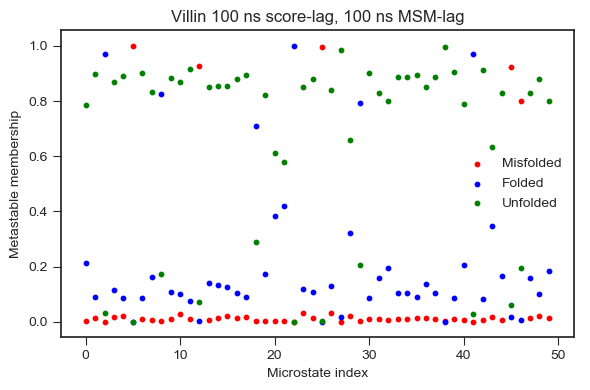

In [67]:
plt.figure(dpi=100)
plt.scatter(range(50), meta_membs[:,0], color='red', s=10, label='Misfolded')
plt.scatter(range(50), meta_membs[:,1], color='blue', s=10, label='Folded')
plt.scatter(range(50), meta_membs[:,2], color='green', s=10, label='Unfolded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('Villin 100 ns score-lag, 100 ns MSM-lag')
plt.legend()
plt.tight_layout()
plt.savefig('villin_scorelag100ns_metastable_membs.png', dpi=300)
plt.show()

In [ ]:
# code to check whether at a given membership threshold, all states chosen from one MSM lag time are also chosen
# from another MSM lag time

In [51]:
# threshold = 0.99

# diffs = []

# for state in range(50):
#     if meta_membs[state,0] > threshold:
#         if not (meta_membs2[state,0] > threshold):
#             diffs.append('Bad')
#         else:
#             diffs.append('Good')
#     if meta_membs[state,1] > threshold:
#         if not (meta_membs2[state,1] > threshold):
#             diffs.append('Bad')
#         else:
#             diffs.append('Good')
#     if meta_membs[state,2] > threshold:
#         if not (meta_membs2[state,2] > threshold):
#             diffs.append('Bad')
#         else:
#             diffs.append('Good')        

In [52]:
# diffs